In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\glaucoma copy.csv')
print(df)
print (df.dtypes)
df = df.drop(labels=[359], axis=0)

    Filename  ExpCDR Eye Set  Glaucoma
0    001.jpg  0.7097  OD   A         0
1    002.jpg  0.6953  OS   A         0
2    003.jpg  0.9629  OS   A         0
3    004.jpg  0.7246  OD   A         0
4    005.jpg  0.6138  OS   A         0
..       ...     ...  ..  ..       ...
645  646.jpg  0.6560  OD   A         1
646  647.jpg  0.7365  OD   A         1
647  648.jpg  0.5101  OS   A         1
648  649.jpg  0.5227  OD   B         0
649  650.jpg  0.6195  OS   B         1

[650 rows x 5 columns]
Filename     object
ExpCDR      float64
Eye          object
Set          object
Glaucoma      int64
dtype: object


In [20]:
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pickle
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# Set path to image folder
image_folder_path = r'C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\ORIGA\ORIGA\Flatten images'
train_folder_path = r"C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train"
val_folder_path = r"C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Validation"

# Get list of all image files in folder
image_files = glob.glob(os.path.join(image_folder_path, '*.jpg'))

# Define image size
image_size = (512, 512)

# Load flattened images into an array
data = []
for image_file in image_files:
    # Load image and resize
    image = Image.open(image_file).resize(image_size)
    flattened_array = np.array(image).reshape(-1)
    data.append(flattened_array)
    #print(f"Image shape: {flattened_array.shape}")

# Load spreadsheet data and map to image filenames
image_labels = df["Glaucoma"]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, image_labels, test_size=0.3, random_state=42)

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
)

# Load image data from directory
image_data = image_generator.flow_from_directory(
    image_folder_path,
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)
# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=image_size+(3,))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add a new classifier on top of the pre-trained layers
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create a tf.data.Dataset from the generator
dataset = tf.data.Dataset.from_generator(
    lambda: image_data,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 512, 512, 3], [None, 1])
)
train_generator = image_generator.flow_from_directory(
    train_folder_path,
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42,
    subset='training',
    classes=['Glaucoma_Negative', 'Glaucoma_Positive']
)
val_generator = image_generator.flow_from_directory(
    val_folder_path,
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42,
    subset='validation',
    classes=['Glaucoma_Negative', 'Glaucoma_Positive']
)


# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Evaluate the model
accuracy = model.evaluate(val_generator)[1]
print(f"Accuracy: {accuracy}")

# Save the model
model.save('my_model.h5')


Found 1298 images belonging to 2 classes.
Found 520 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Epoch 1/10
17/17 [==============================] - 111s 6s/step - loss: 0.5634 - accuracy: 0.7308
Epoch 2/10
17/17 [==============================] - 104s 6s/step - loss: 0.5349 - accuracy: 0.7404
Epoch 3/10
17/17 [==============================] - 103s 6s/step - loss: 0.4981 - accuracy: 0.7615
Epoch 4/10
17/17 [==============================] - 101s 6s/step - loss: 0.4863 - accuracy: 0.7788
Epoch 5/10
17/17 [==============================] - 98s 6s/step - loss: 0.4780 - accuracy: 0.7731
Epoch 6/10
17/17 [==============================] - 100s 6s/step - loss: 0.4749 - accuracy: 0.7769
Epoch 7/10
17/17 [==============================] - 98s 6s/step - loss: 0.4627 - accuracy: 0.7731
Epoch 8/10
17/17 [==============================] - 105s 6s/step - loss: 0.4783 - accuracy: 0.7788
Epoch 9/10
17/17 [==============================] - 109s 6s/step - loss: 0.4610 - accura

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [3]:
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pickle
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# Set path to image folder
image_folder_path = r'C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\ORIGA\ORIGA\Flatten images\Flattened 2'
train_folder_path = r"C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train"
val_folder_path = r"C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Validation"

# Get list of all image files in folder
image_files = glob.glob(os.path.join(image_folder_path, '*.jpg'))

# Define image size
image_size = (512, 512)

# Load flattened images into an array
data = []
for image_file in image_files:
    # Load image and resize
    image = Image.open(image_file).resize(image_size)
    flattened_array = np.array(image).reshape(-1)
    data.append(flattened_array)
    #print(f"Image shape: {flattened_array.shape}")

# Load spreadsheet data and map to image filenames
#df = pd.read_excel(r"C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\ORIGA\ORIGA\ORIGA.xlsx")
#df["Image Filename"] = df["Image Filename"].apply(lambda x: x+".jpg")
#df = df.set_index("Image Filename")
image_labels = df["Glaucoma"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, image_labels, test_size=0.3, random_state=42)

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
)

# Load image data from directory
train_generator = image_generator.flow_from_directory(
    train_folder_path,
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

val_generator = image_generator.flow_from_directory(
    val_folder_path,
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=image_size+(3,))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add a new classifier on top of the pre-trained layers
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

# Evaluate the model
accuracy = model.evaluate(val_generator)[1]

# Save the model
#model.save('20runs_model.h5')


Found 520 images belonging to 2 classes.
Found 130 images belonging to 2 classes.
Epoch 1/20
17/17 [==============================] - 143s 8s/step - loss: 0.5753 - accuracy: 0.7423 - val_loss: 0.5931 - val_accuracy: 0.7308
Epoch 2/20
17/17 [==============================] - 136s 8s/step - loss: 0.5144 - accuracy: 0.7500 - val_loss: 0.6094 - val_accuracy: 0.7077
Epoch 3/20
17/17 [==============================] - 131s 8s/step - loss: 0.5096 - accuracy: 0.7692 - val_loss: 0.6166 - val_accuracy: 0.6615
Epoch 4/20
17/17 [==============================] - 123s 8s/step - loss: 0.4822 - accuracy: 0.7731 - val_loss: 0.5953 - val_accuracy: 0.7231
Epoch 5/20
 4/17 [======>.......................] - ETA: 1:02 - loss: 0.4795 - accuracy: 0.8077

KeyboardInterrupt: 

In [10]:
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pickle
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# Set path to image folder
image_folder_path = r'C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\ORIGA\ORIGA\Flatten images\Flattened 2'
train_folder_path = r"C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train"
val_folder_path = r"C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Validation"

# Get list of all image files in folder
image_files = glob.glob(os.path.join(image_folder_path, '*.jpg'))

# Define image size
image_size = (512, 512)

# Load flattened images into an array
data = []
for image_file in image_files:
    # Load image and resize
    image = Image.open(image_file).resize(image_size)
    flattened_array = np.array(image).reshape(-1)
    data.append(flattened_array)
    #print(f"Image shape: {flattened_array.shape}")

# Load spreadsheet data and map to image filenames
#df = pd.read_excel(r"C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\ORIGA\ORIGA\ORIGA.xlsx")
#df["Image Filename"] = df["Image Filename"].apply(lambda x: x+".jpg")
#df = df.set_index("Image Filename")
image_labels = df["Glaucoma"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, image_labels, test_size=0.3, random_state=42)

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
)

# Load image data from directory
train_generator = image_generator.flow_from_directory(
    train_folder_path,
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

val_generator = image_generator.flow_from_directory(
    val_folder_path,
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=image_size+(3,))

# Freeze the pre-trained layers except the last two residual blocks
for layer in base_model.layers[:-18]:
    layer.trainable = False

# Add a new classifier on top of the pre-trained layers
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

# Evaluate the model
accuracy = model.evaluate(val_generator)[1]

# Save the model
#model.save('50+unfreezingruns_model.h5')

Found 520 images belonging to 2 classes.
Found 130 images belonging to 2 classes.
Epoch 1/50


KeyboardInterrupt: 

Found 520 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


32
0.0


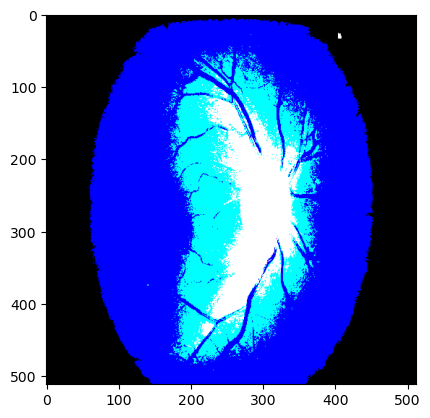

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


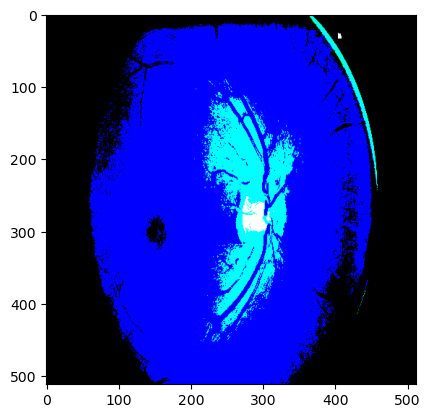

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


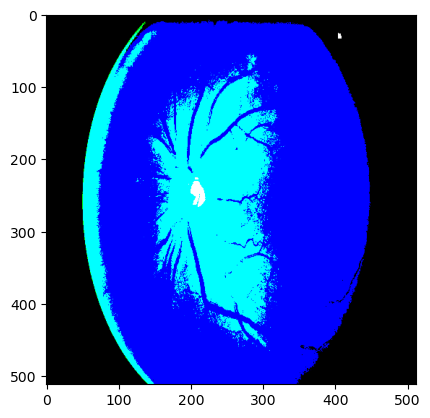

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


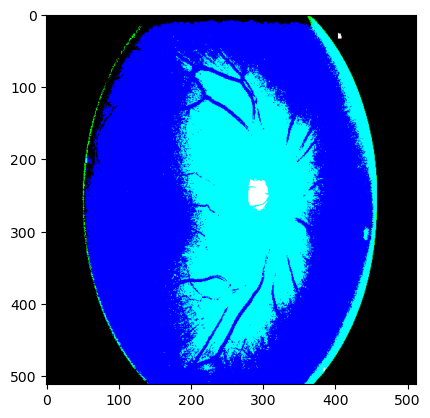

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


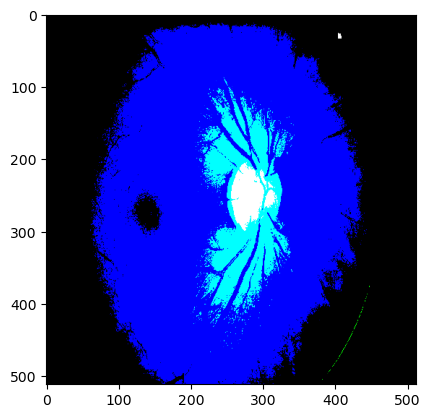

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0


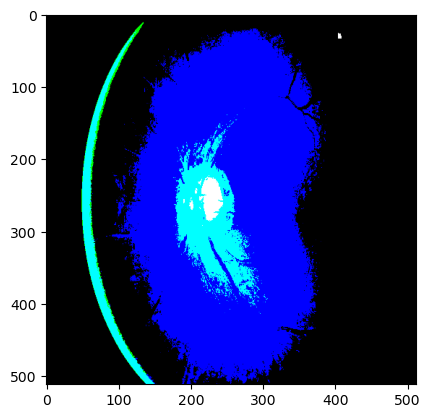

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


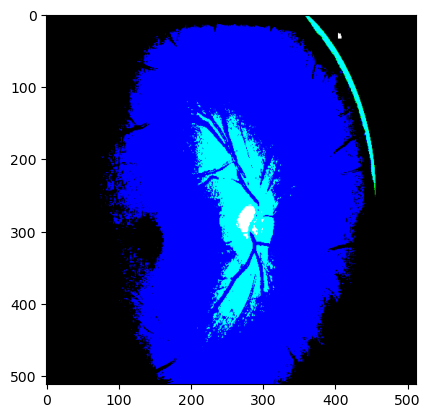

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


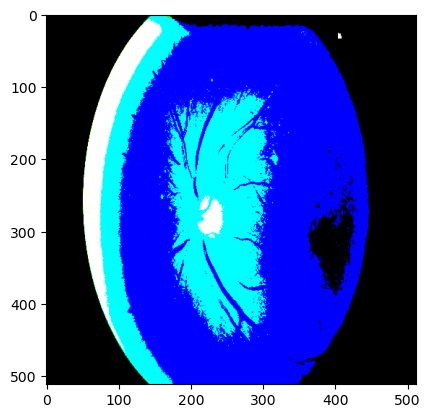

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


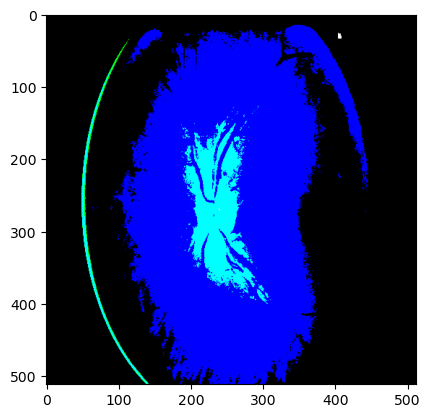

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0


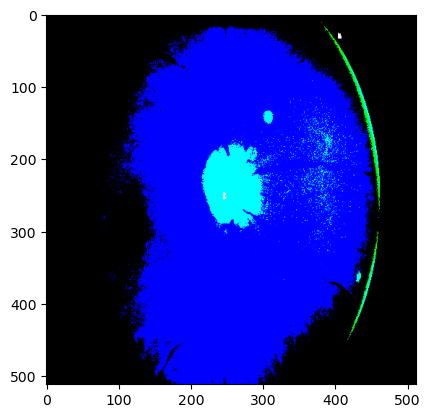

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


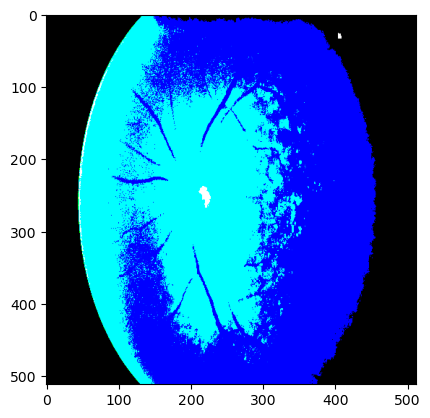

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


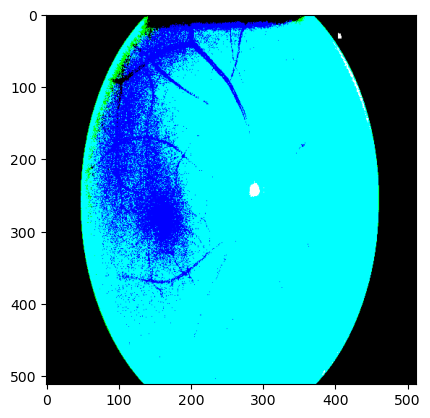

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


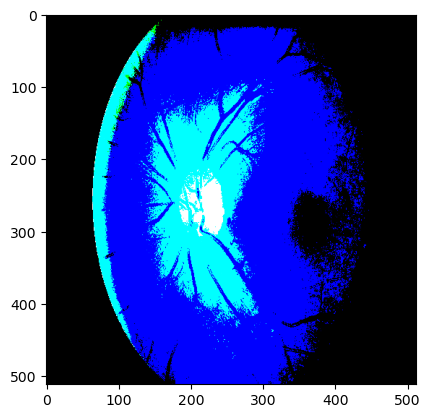

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0


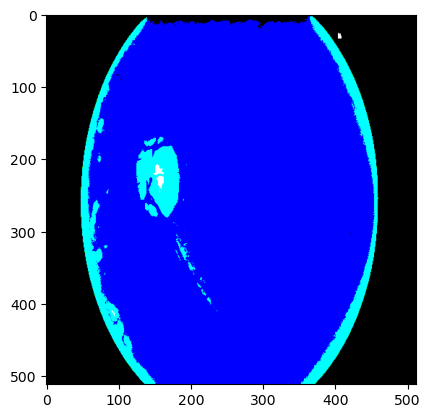

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


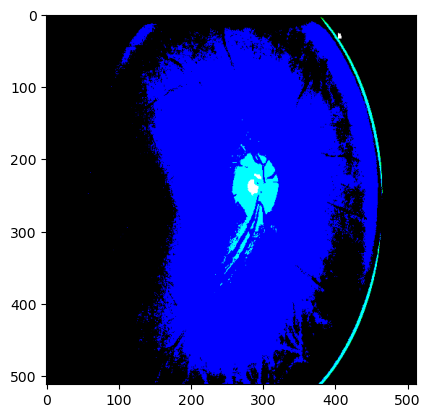

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


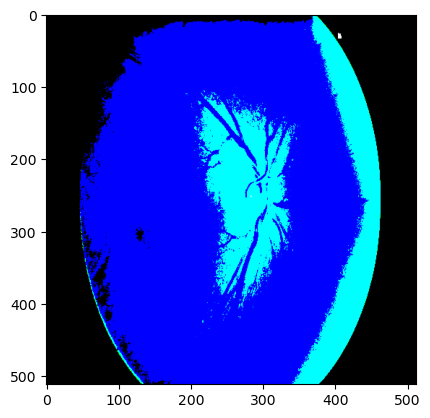

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


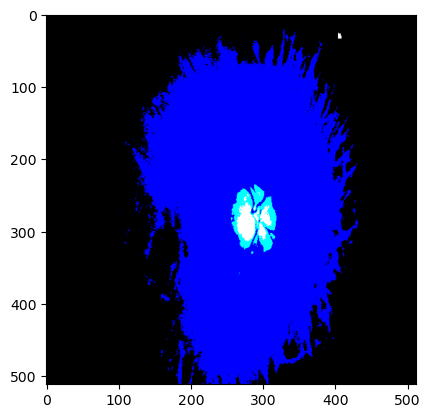

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


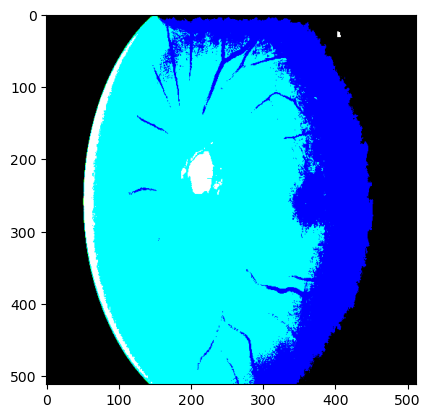

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0


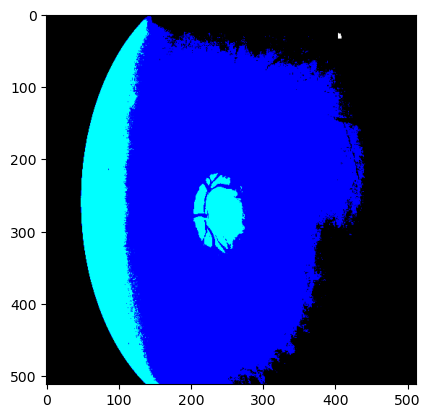

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


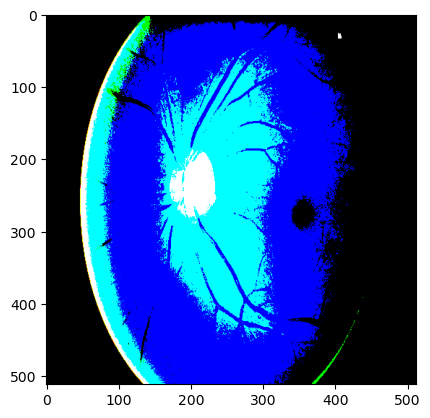

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


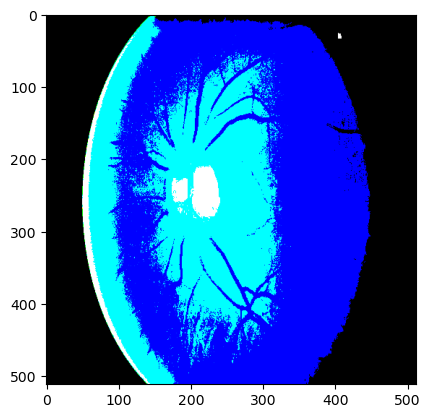

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


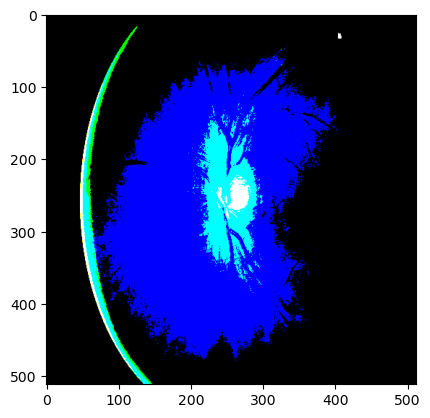

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


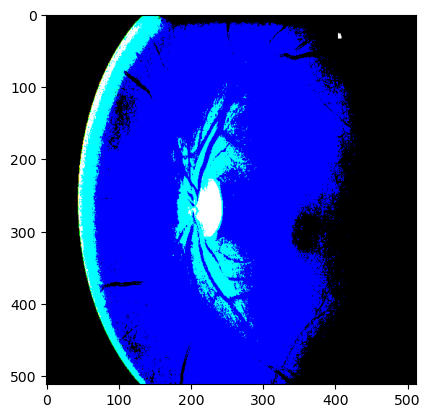

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


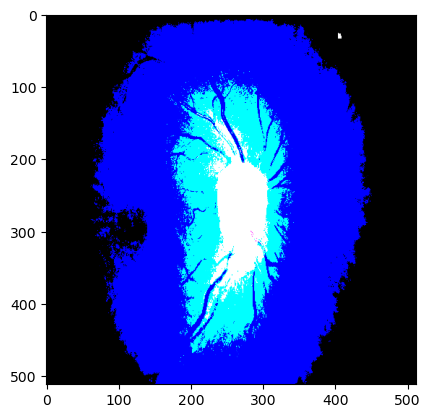

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


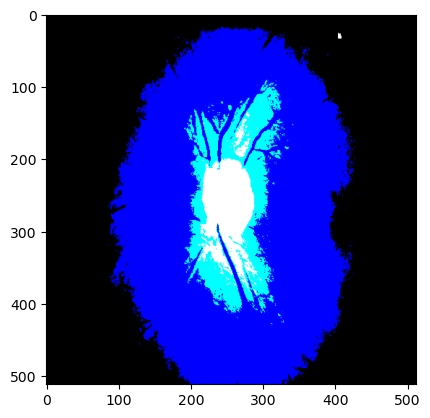

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


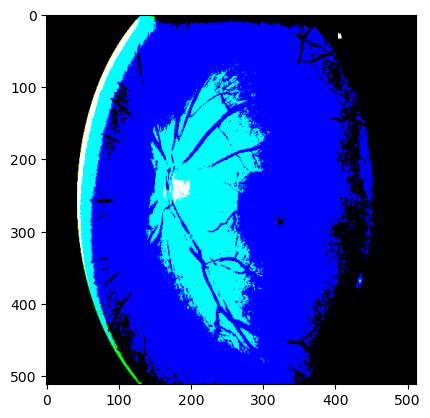

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


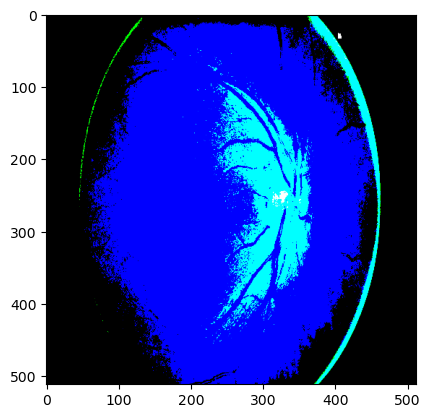

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0


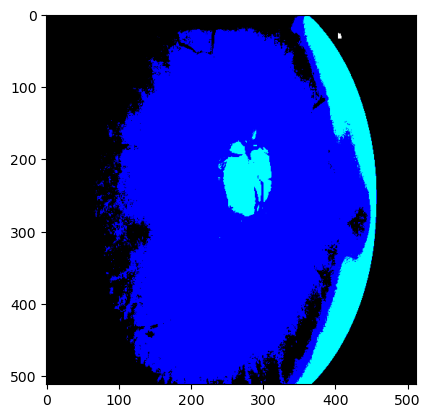

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0


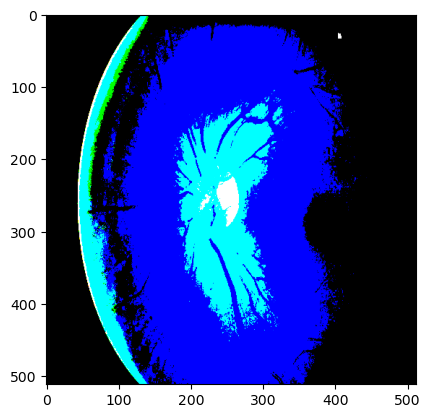

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


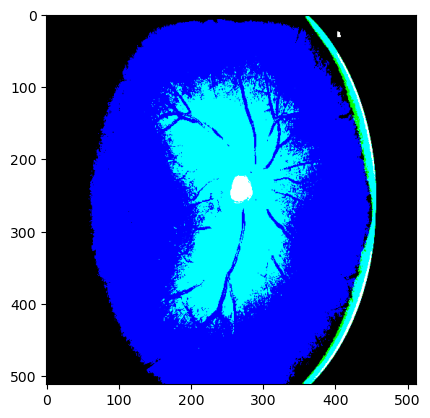

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


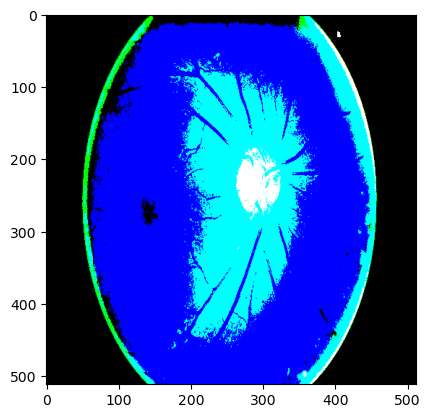

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


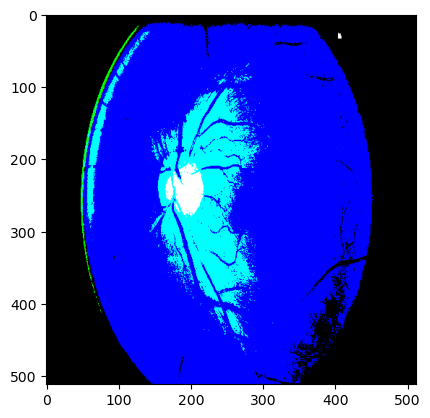

Found 130 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


32
0.0


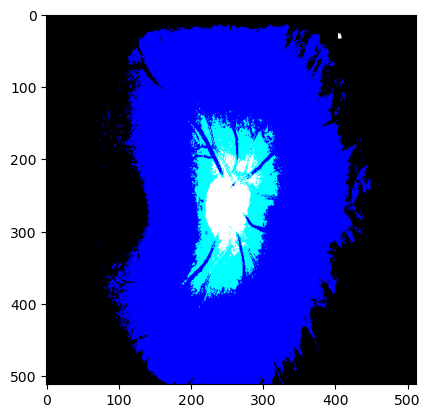

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


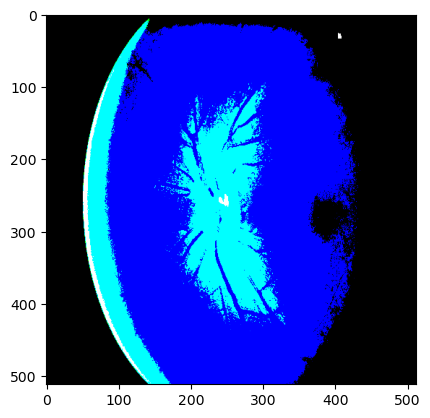

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


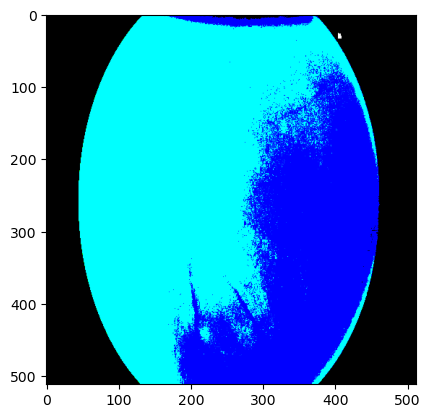

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


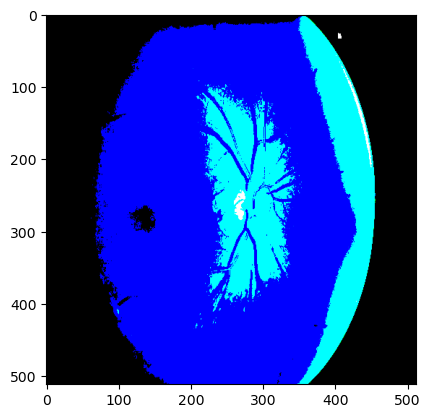

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0


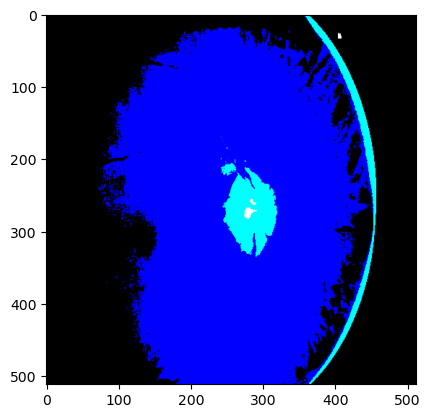

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


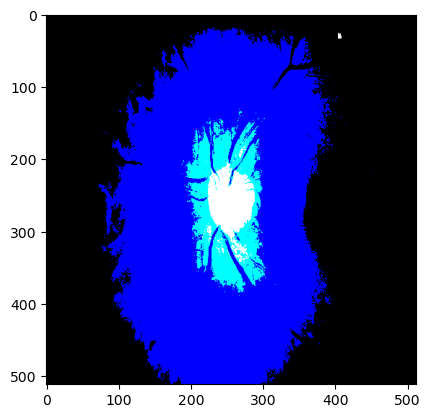

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


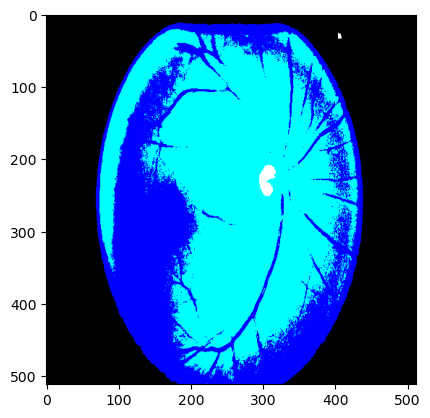

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0


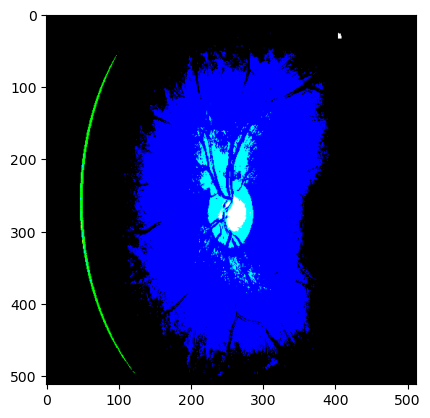

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


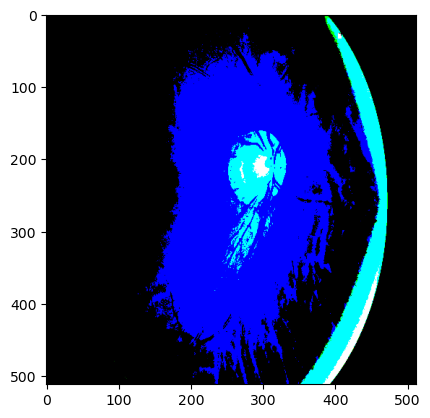

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


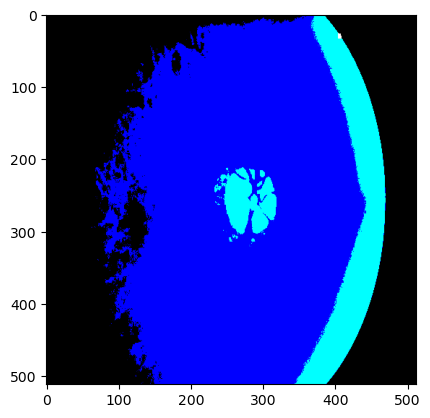

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


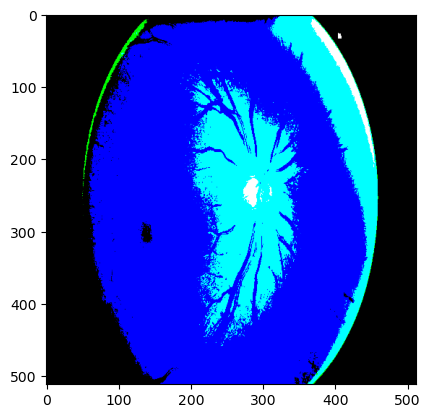

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


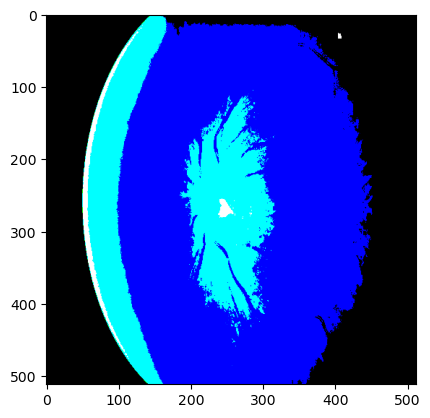

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


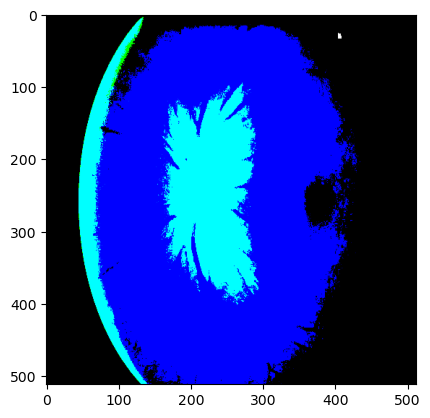

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


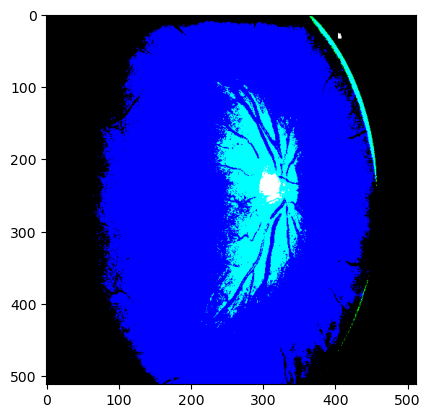

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0


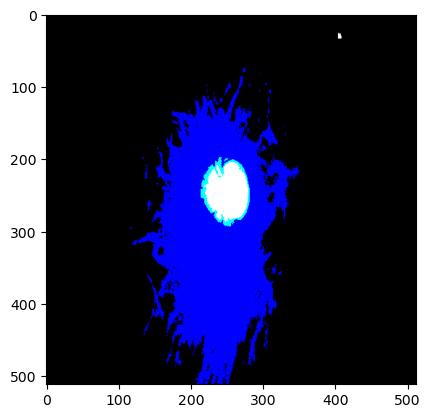

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0


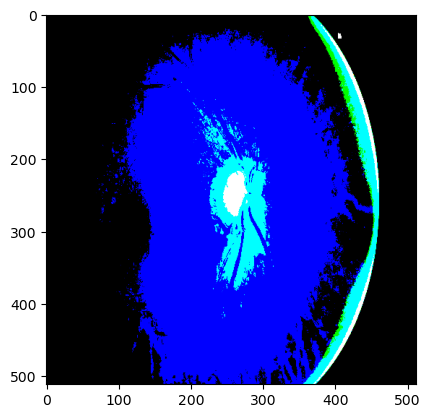

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


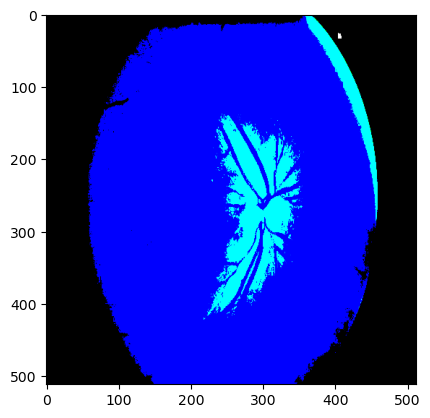

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


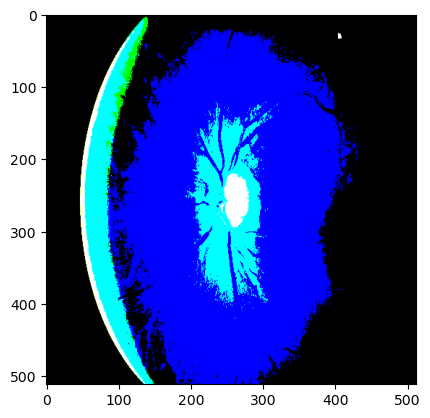

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


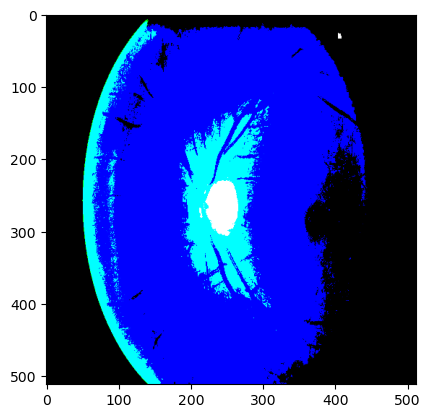

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


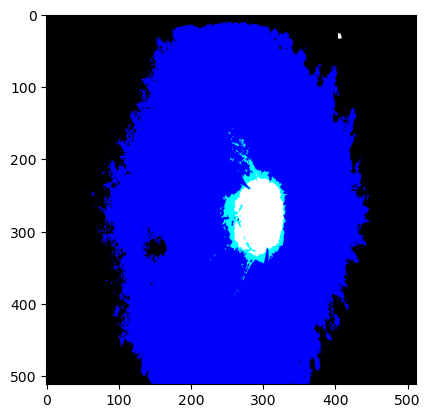

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


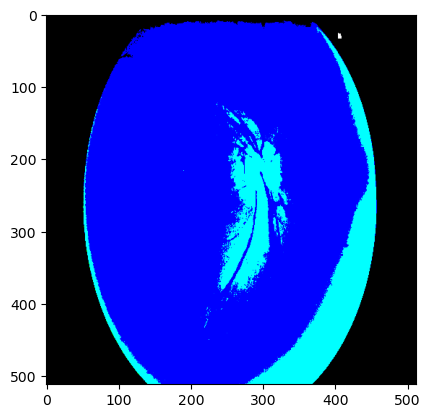

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


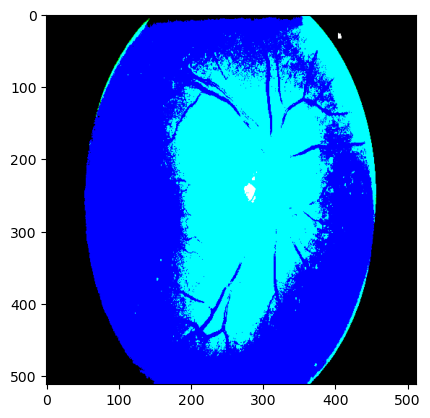

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0


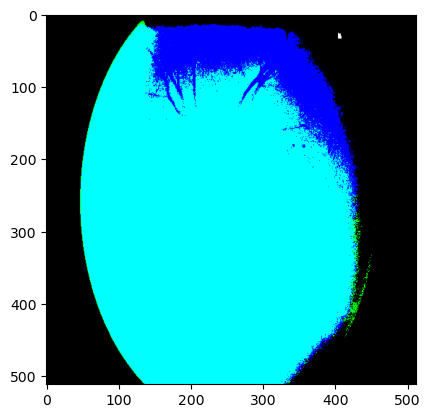

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


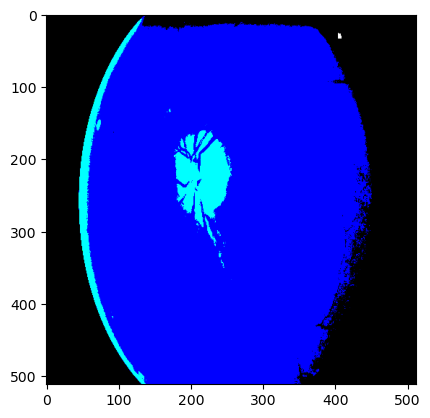

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0


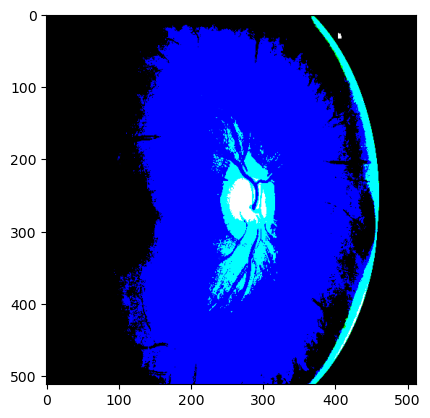

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


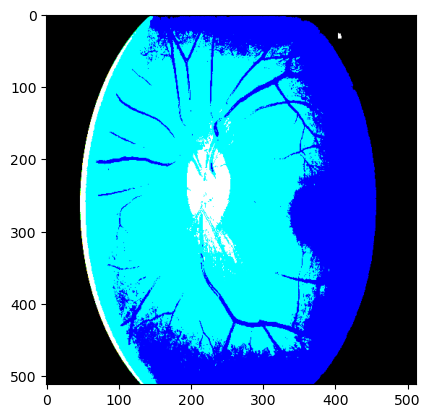

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


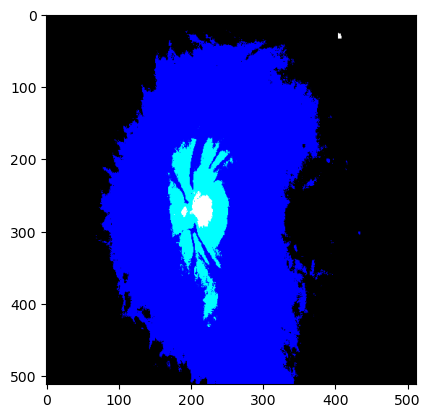

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


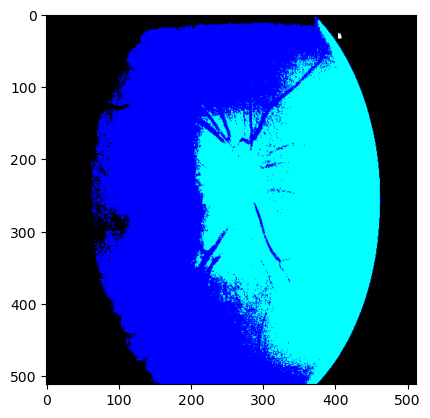

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


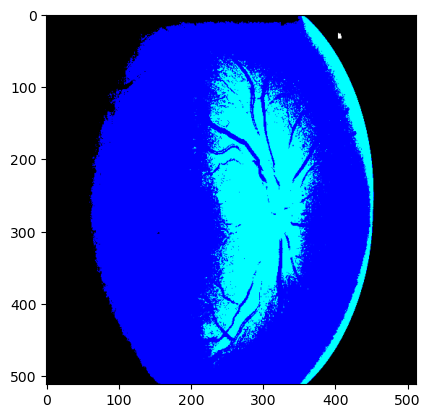

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


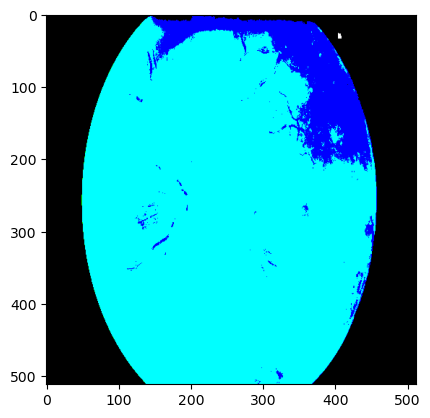

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


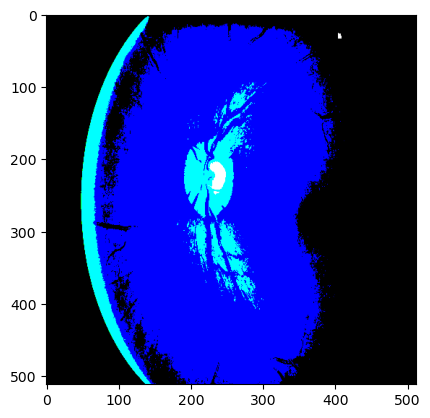

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


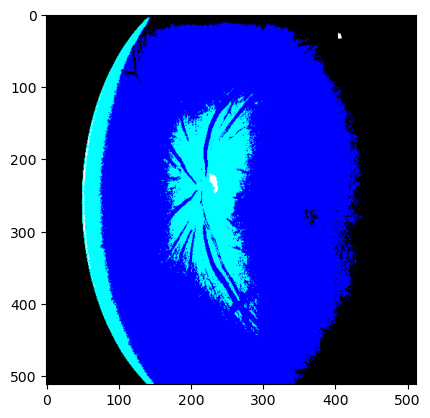

Test accuracy: 0.7307692170143127


In [14]:
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pickle
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# Set path to image folder
image_folder_path = r'C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\ORIGA\ORIGA\Flatten images\Flattened 2'
train_folder_path = r"C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train"
val_folder_path = r"C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Validation"

# Get list of all image files in folder
image_files = glob.glob(os.path.join(image_folder_path, '*.jpg'))

# Define image size
image_size = (512, 512)

# Load flattened images into an array
data = []
for image_file in image_files:
    # Load image and resize
    image = Image.open(image_file).resize(image_size)
    flattened_array = np.array(image).reshape(-1)
    data.append(flattened_array)

# Load spreadsheet data and map to image filenames
#df = pd.read_excel(r"C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\ORIGA\ORIGA\ORIGA.xlsx")
#df["Image Filename"] = df["Image Filename"].apply(lambda x: x+".jpg")
#df = df.set_index("Image Filename")
image_labels = df["Glaucoma"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, image_labels, test_size=0.3, random_state=42)

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
)

# Load image data from directory
train_generator = image_generator.flow_from_directory(
    train_folder_path,
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)
import matplotlib.pyplot as plt
%matplotlib inline
image_batch, label_batch = train_generator.next()
print(len(image_batch))
for i in range(0, len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    plt.imshow(image)
    plt.show()

val_generator = image_generator.flow_from_directory(
    val_folder_path,
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)
%matplotlib inline
image_batch, label_batch = val_generator.next()
print(len(image_batch))
for i in range(0, len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    plt.imshow(image)
    plt.show()

# Load the saved model
model = load_model('20runs_model.h5')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(val_generator, verbose=0)

print('Test accuracy:', test_acc)